In [1]:
import os

In [2]:
os.chdir('../../..')

In [3]:
import convokit

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
corpus = convokit.Corpus(filename=convokit.download('reddit-corpus-small'))

Dataset already exists at /Users/calebchiam/.convokit/downloads/reddit-corpus-small


Let's get the fighting words for r/news and r/the_donald:

In [26]:
fw = convokit.FightingWords(l1_selector=lambda utt: utt.meta['subreddit'] == 'Christianity',
                           l2_selector=lambda utt: utt.meta['subreddit'] == "atheism",
                           ngram=(1,1))

Initializing default CountVectorizer...


In [27]:
# %matplotlib inline
# %matplotlib qt
fw.analyze(corpus).head(10)

l1_func returned 2659 valid utterances. l2_func returned 2736 valid utterances.
Vocab size is 2041
Comparing language...
ngram zscores computed.


,z-score
ngram,
money,-7.811203
religion,-7.508022
religious,-7.193264
body,-6.949705
science,-6.895417
baby,-6.582830
its,-5.903673
shit,-5.706387
article,-5.668432


In [28]:
fw.analyze(corpus).tail(10)

,z-score
ngram,
bible,5.713096
homosexuality,6.160125
gay,6.235346
scripture,6.639638
church,7.073564
jesus,7.379116
christ,7.679362
word,8.188325
sin,9.293763


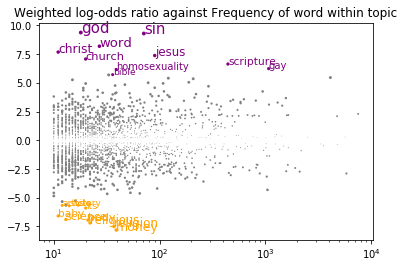

In [29]:
fw.plot_fighting_words()

In [30]:
# Words that are more typical of r/Christianity

In [31]:
fw.get_zscore("love")

5.46088680806953

In [32]:
fw.get_zscore("forgive")

2.0312205264606167

In [33]:
fw.get_zscore("repent")

3.1103346914770866

In [34]:
fw.get_zscore("marriage")

2.5300556096361113

In [35]:
# Words that are more typical of r/atheism

In [36]:
fw.get_zscore("government")

-4.180040852590942

In [37]:
fw.get_zscore("state")

-3.6401057373947268

In [38]:
fw.get_zscore("separation")

-1.9314789506982686

In [39]:
fw.get_zscore('education')

-3.8106964134711494

In [40]:
fw.get_zscore('morals')

-2.2841859709457952

In [41]:
fw.annot_method

'top_k'

In [42]:
fw.transform(corpus)

In [43]:
list(fw.get_top_k_ngrams()[0])

['god',
 'sin',
 'word',
 'christ',
 'jesus',
 'church',
 'scripture',
 'gay',
 'homosexuality',
 'bible']

In [45]:
for utt in corpus.iter_utterances():
    if utt.meta["subreddit"] in ["atheism", "Christianity"]:
        if len(utt.meta['fighting_words_l1']) > 0:
            print(utt.meta['subreddit'])
            print(utt.meta['fighting_words_l1'])
            print(utt.meta['fighting_words_l2'])
            print(utt.text)
            break

Christianity
['sin', 'church']
['religion', 'religious']
Parents are strict, Orthodox and religious. Father is a priest. I was born in a country where the majority were Orthodox so I've grown up with faith. We moved to American a decade ago and it's been the same since.


But now, I feel so disillusioned. I feel so guilty about this but I simply don't believe in God like I used to. I despise going to church because of how strict it is. My whole family has to get up at 4am and attend church from 5am-10am. Not only that, but we have to stand 95% of the time. Every Sunday, I'm exhausted, bored out of my mind because it's in a language I don't understand and self conscious whenever I sit.


I don't know if it's just me losing faith or if I just *really* dislike my church environment. What I wouldn't give to go to a church in the afternoon or late morning with a 2 hour service where I could sit....but I can't even bring it up to my parents because they would 110% take it as a betrayal. I ca